In [1]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns
# import os
# from glob import glob
# import numpy as np
from level2_utils import get_data_for_confirmed_train_subjs, read_yaml_for_host
# from level2_utils import *

import sys
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/analyses/intervention_moderation/')
from dev_interaction_util import load_groups_from_mastersheet
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/')
import level2.level2_utils



config_data = read_yaml_for_host("l2_config.yml")
# nonbids_data_path = config_data['nonbids_data_path']
# ml_data_folderpath = nonbids_data_path + "fMRI/ml"
# dev_scripts_path = config_data['dev_scripts_path']
# ml_scripting_path = dev_scripts_path + "/fMRI/ml"
dropbox_datapath = config_data['dropbox_datapath']
sst_level_2_path = config_data['sst_level_2_path']

spm_path = config_data['spm_path']

analysis_name = 'health_conditions'

output_name = analysis_name + '_groups'

groups_by_name = load_groups_from_mastersheet(dropbox_datapath + 'DEV Participant Mastersheet_copy.xlsx')


Benjamins-MacBook-Pro-3.local


In [2]:
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/')
import modeling_utils

In [3]:
sst_level_2_path

'/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/'

In [4]:
dir_for_analysis = sst_level_2_path + 'health_conditions_groups_20240103/raw_filelist.csv'

In [5]:
analysis_subject_table_raw = pd.read_csv(dir_for_analysis,index_col=0)
groups_by_name = load_groups_from_mastersheet(dropbox_datapath + 'DEV Participant Mastersheet_copy.xlsx')

#merge on subject ID
analysis_subject_table = analysis_subject_table_raw.merge(groups_by_name, how='left', left_on='subject_id', right_on='dev_id')

In [6]:
# print(set(analysis_subject_table_raw.subject_id).difference(set(included_subjects)))
# print(set(included_subjects).difference(set(analysis_subject_table_raw.subject_id)))

Now filter on data quality.

In [7]:
train_betas_with_data = modeling_utils.get_sst_data_for_confirmed_sessions_across_tasks(
    beta_glob = config_data['nonbids_data_path'] + "fMRI/fx/models/SST/all_waves/health_conditions/sub-DEV*/",
    #nonbids_data_path = config_data['nonbids_data_path'],
    #ml_data_folderpath = ml_data_folderpath,
    #ml_scripting_path = config_data['dev_scripts_path'] + "/fMRI/ml",
    dropbox_datapath=config_data['dropbox_datapath'],
    subj_wave_inclusion='all',
    automotion_datapath = config_data['automotion_output_path'],
)


included_subjects = train_betas_with_data['subject_id'].unique()
del train_betas_with_data

loaded 275 rows from data_by_ppt.csv
(250, 2) (275, 173) (287, 175)
(543, 42) (571, 51) (572, 95)
(287, 176) (572, 95) (574, 270)
['beta_subject_id', 'SID', 'subject_id', 'redcap_dev_id', 'redcap_wave', 'labelled_exclusion_wave', 'labelled_exclusion_missing wave', 'wave_id', 'automotion_exclude_wave']


/Users/benjaminsmith/anaconda/envs/neuroanalysis/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:617: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session.loc[:,col + '_quality'] = all_data_by_session[col].apply(lambda x: 1 if x=='No reported problems' else 0)
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:617: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

subjects who did or did not pass the scanner room report check:
redcap_SST
Investigate               8
May not be usable         6
Minor problems           35
No reported problems    536
Unusable                 25
dtype: int64
redcap_SST_quality
1    536
0    106
Name: count, dtype: int64
subjects who did or did not pass the auto motion check:
automotion_exclude_SST1_quality
1    527
0    115
Name: count, dtype: int64
subjects who did or did not pass the labelled data check motion check:
labelled_exclusion_SST_Exclude_quality
1    603
0     39
Name: count, dtype: int64


/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:677: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session['combined_' + task + str(run_i) + '_quality' + str(run_i)] = (
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/modeling_utils.py:677: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_by_session['combined_' + task + str(run_i) + '_quality' + str(run_i)] = (
/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI

In [8]:
# roi_table_path = sst_level_2_path + 'health_conditions_groups_20240103/Unhealthy_NoGo(W2-W1)/rois_raw.csv'

# roi_table_1 = pd.read_csv(roi_table_path)
# roi_table_insula_path = sst_level_2_path + 'health_conditions_groups_20240103/Unhealthy_NoGo(W2-W1)/rois_raw_insula.csv'
# roi_table_insula = pd.read_csv(roi_table_insula_path)



# spm_roi_table = pd.concat([roi_table_1,roi_table_insula],axis=1)

In [9]:
# spm_roi_table_vars = spm_roi_table.columns.values

In [10]:
roi_table_functional_path = '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/data/subject_sst_health_avg_roi_data_raw_zscored2_w_sigs.csv'
roi_table_functional = pd.read_csv(roi_table_functional_path,index_col=0)


In [11]:
#remove functional striatum areas
roi_table_functional = roi_table_functional[roi_table_functional.mask_label.str.contains('Accumbens|Caudate|Putamen')==False]

In [12]:
roi_table_functional.loc[(roi_table_functional.condition=='Stop') & (roi_table_functional.mask_label=='CS-CG_conditions_20231108_spmT_0001'),]

,subject_id,wave,spm_output_path,condition,beta_name,mask_label,roi_activity
0,DEV014,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,2.247423
1,DEV015,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.755701
2,DEV017,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,3.561341
3,DEV019,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.685674
4,DEV021,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,8.015286
...,...,...,...,...,...,...,...
168,DEV307,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,3.453030
169,DEV308,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,2.536315
170,DEV309,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,1.871866
171,DEV310,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,Stop,con_0006.nii,CS-CG_conditions_20231108_spmT_0001,2.683775


## analysis

In [13]:
roi_table_functional.loc[(roi_table_functional.subject_id=='DEV014') &(roi_table_functional.condition=='Stop'),].sort_values(['condition','mask_label'])

# detect and remove duplicates in roi_table_functional
roi_table_functional_nodups = roi_table_functional.loc[~roi_table_functional.duplicated(['subject_id','condition','mask_label','roi_activity'])]
roi_table_functional = roi_table_functional_nodups

In [14]:
roi_table_functional_mask_names = roi_table_functional.mask_label.unique()
#transform wider using mask_label as the column names and roi_activity as the values
roi_table_functional_wide = roi_table_functional.pivot(
    index=['subject_id'],
    columns=['condition','mask_label'],
    values='roi_activity')

#now flatten the column names
roi_table_functional_wide.columns = ['_'.join(col).strip() for col in roi_table_functional_wide.columns.values]
roi_table_functional_wide = roi_table_functional_wide.reset_index()

In [15]:
# [df.columns[0:5] for df in [analysis_subject_table,spm_roi_table, roi_table_functional_wide[roi_table_functional_wide.columns]]]

In [16]:
analysis_subject_table

,SID,beta_subject_id,subject_id,redcap_dev_id,data_by_ppt_merge_status,redcap_SST,labelled_exclusion_SST_Exclude,labelled_exclusion_WTP3_Exclude,labelled_exclusion_WTP4_Exclude,spm_output_path,...,contrast_Unhealthy_Go(W2-W1)_fname,contrast_Unhealthy_Go(W1-W2)_fname,contrast_Unhealthy_NoGo(W2-W1)_fname,contrast_Unhealthy_NoGo(W1-W2)_fname,contrast_Null_Cue(W2-W1)_fname,contrast_Null_Cue(W1-W2)_fname,contrast_Stop(Healthy>Unhealthy)(W2-W1)_fname,contrast_Stop(Healthy>Unhealthy)(W1-W2)_fname,dev_id_y,intervention_group
0,DEV014,DEV014,DEV014,DEV014,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV014,mckenzie
1,DEV015,DEV015,DEV015,DEV015,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV015,mckenzie
2,DEV017,DEV017,DEV017,DEV017,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV017,willamette
3,DEV019,DEV019,DEV019,DEV019,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV019,mckenzie
4,DEV021,DEV021,DEV021,DEV021,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV021,willamette
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,DEV307,DEV307,DEV307,DEV307,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV307,mckenzie
169,DEV308,DEV308,DEV308,DEV308,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV308,willamette
170,DEV309,DEV309,DEV309,DEV309,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV309,umpqua
171,DEV310,DEV310,DEV310,DEV310,participant_present,No reported problems,NaN,NaN,NaN,/Users/benjaminsmith/Google Drive/oregon/data/...,...,con_0016.nii,con_0017.nii,con_0018.nii,con_0019.nii,con_0020.nii,con_0021.nii,con_0022.nii,con_0023.nii,DEV310,mckenzie


In [17]:
# spml2_derived = pd.concat([analysis_subject_table,spm_roi_table],axis=1)
spml2_derived=analysis_subject_table

subjects_with_rois = pd.merge(spml2_derived,roi_table_functional_wide,how='left',on='subject_id')

roi_table_functional_mask_names = roi_table_functional_wide.columns.values[1:]

In [18]:
subjects_with_rois = pd.merge(spml2_derived,roi_table_functional_wide,how='left',on='subject_id')

OK, we have the data, now let's do some contrasts. Contrast umpqua and mckenzie with willamette on both ROIs using a t-test

In [19]:
roi_colnames = roi_table_functional_mask_names.tolist()

In [20]:
# subjects_with_rois.loc[subjects_with_rois['intervention_group'] == 'willamette',['subject_id',roi_colnames]]

In [21]:
for roi_colname in roi_colnames:
    print(roi_colname)
    for experimental_group in ['umpqua','mckenzie']:
        print(experimental_group)
        control_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == 'willamette',roi_colname]
        experimental_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == experimental_group,roi_colname]
        #do independent-samples t-test

        t,p = ttest_ind(control_group_data,experimental_group_data)
        print('cont: ' + str(np.round(np.mean(control_group_data),4)) + '; exp: ' + str(np.round(np.mean(experimental_group_data),4)))
        print("t-score: " + str(np.round(t,4)) + "; p-val: " + str(np.round(p,4)))
    print("")
        
        

Stop(Healthy>Unhealthy)(W1-W2)_CS-CG_conditions_20231108_spmT_0001
umpqua
cont: 0.2561; exp: -0.1489
t-score: 2.6086; p-val: 0.0103
mckenzie
cont: 0.2561; exp: -0.0135
t-score: 1.5697; p-val: 0.1194

Stop(Healthy>Unhealthy)(W1-W2)_CS-FS_conditions_20231108_spmT_0001
umpqua
cont: -0.0718; exp: 0.1143
t-score: -2.1364; p-val: 0.0348
mckenzie
cont: -0.0718; exp: 0.0458
t-score: -1.2582; p-val: 0.211

Stop(Healthy>Unhealthy)(W1-W2)_CueFollowing(CS>FS)striatal_cluster_combined_20221207
umpqua
cont: 0.0002; exp: -0.0003
t-score: 1.3217; p-val: 0.1889
mckenzie
cont: 0.0002; exp: 0.0004
t-score: -0.3643; p-val: 0.7163

Stop(Healthy>Unhealthy)(W1-W2)_CueFollowing(CS>FS)striatal_cluster_combined
umpqua
cont: 0.0002; exp: -0.0003
t-score: 1.4164; p-val: 0.1593
mckenzie
cont: 0.0002; exp: 0.0004
t-score: -0.3029; p-val: 0.7625

Stop(Healthy>Unhealthy)(W1-W2)_CueFollowing(CS>FS)striatal_cluster_combined_20230512
umpqua
cont: 0.0002; exp: -0.0003
t-score: 1.4164; p-val: 0.1593
mckenzie
cont: 0.0002;

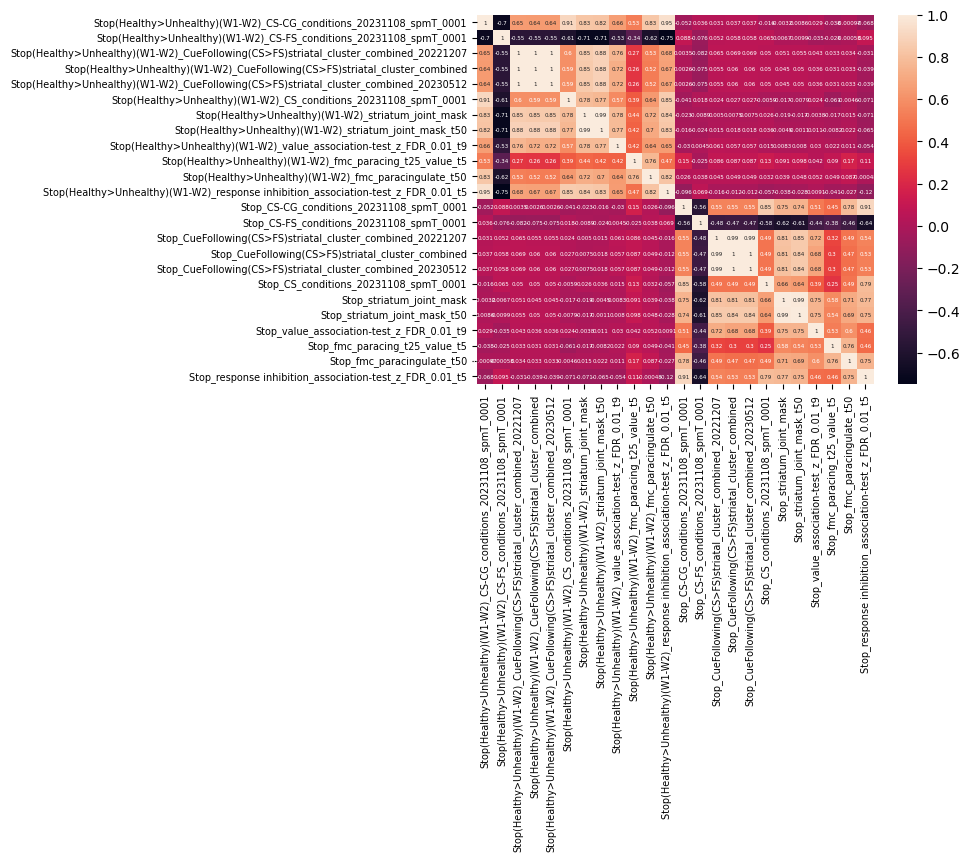

In [22]:
import matplotlib.pyplot as plt
#do a correlation matrix plot for all the valuation_cols
import seaborn as sns



#now do the corrplot
#print a heatmap with two-digit correlation coefficients for each pair of variables
#use annot=True and dont' make the font size too big
corr = subjects_with_rois[roi_colnames].corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            annot_kws={"size": 4}
            )
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)

plt.show()

In [23]:
subjects_with_rois[roi_colnames]

,Stop(Healthy>Unhealthy)(W1-W2)_CS-CG_conditions_20231108_spmT_0001,Stop(Healthy>Unhealthy)(W1-W2)_CS-FS_conditions_20231108_spmT_0001,Stop(Healthy>Unhealthy)(W1-W2)_CueFollowing(CS>FS)striatal_cluster_combined_20221207,Stop(Healthy>Unhealthy)(W1-W2)_CueFollowing(CS>FS)striatal_cluster_combined,Stop(Healthy>Unhealthy)(W1-W2)_CueFollowing(CS>FS)striatal_cluster_combined_20230512,Stop(Healthy>Unhealthy)(W1-W2)_CS_conditions_20231108_spmT_0001,Stop(Healthy>Unhealthy)(W1-W2)_striatum_joint_mask,Stop(Healthy>Unhealthy)(W1-W2)_striatum_joint_mask_t50,Stop(Healthy>Unhealthy)(W1-W2)_value_association-test_z_FDR_0.01_t9,Stop(Healthy>Unhealthy)(W1-W2)_fmc_paracing_t25_value_t5,...,Stop_CueFollowing(CS>FS)striatal_cluster_combined_20221207,Stop_CueFollowing(CS>FS)striatal_cluster_combined,Stop_CueFollowing(CS>FS)striatal_cluster_combined_20230512,Stop_CS_conditions_20231108_spmT_0001,Stop_striatum_joint_mask,Stop_striatum_joint_mask_t50,Stop_value_association-test_z_FDR_0.01_t9,Stop_fmc_paracing_t25_value_t5,Stop_fmc_paracingulate_t50,Stop_response inhibition_association-test_z_FDR_0.01_t5
0,0.908516,0.264771,0.001664,0.001491,0.001491,1.030372,0.260958,0.254556,0.496287,1.499444,...,0.000985,0.001030,0.001030,5.434630,0.134504,0.161669,-0.301675,-0.993960,-0.291461,0.484430
1,0.251489,0.093755,-0.001135,-0.001408,-0.001408,0.244227,0.087227,0.016333,0.393085,-0.358188,...,-0.000356,-0.000415,-0.000415,3.184570,-0.217014,-0.181225,-0.108876,-0.555523,0.006554,-0.215388
2,0.510433,-0.080733,-0.000043,-0.000232,-0.000232,0.644747,0.142661,0.145618,0.430321,0.018278,...,0.001839,0.002266,0.002266,5.370871,0.530997,0.583414,-0.359291,0.035844,0.804398,1.325248
3,0.509700,-0.087785,0.000719,0.000656,0.000656,0.983191,0.140519,0.168054,-0.205342,-0.835620,...,-0.000352,-0.000668,-0.000668,4.714046,-0.315309,-0.275684,-0.765467,-1.437749,-0.545579,0.403357
4,-1.214184,0.890297,-0.001036,-0.000979,-0.000979,-2.239521,-0.484039,-0.543785,-0.344843,-0.042611,...,0.004764,0.005029,0.005029,8.160391,2.325624,2.370879,0.250418,6.977297,3.616469,2.790555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,-1.416061,0.752780,-0.000786,-0.000785,-0.000785,-1.159775,-0.278933,-0.315689,-0.546364,-1.265389,...,0.003991,0.003834,0.003834,5.634669,0.669836,0.673195,0.400381,1.719839,1.044729,1.119825
169,0.220579,0.317998,0.000913,0.000833,0.000833,0.475473,0.040512,0.022170,-0.239867,-0.242755,...,-0.000212,-0.000244,-0.000244,4.805338,-0.087989,-0.040474,-0.070354,-0.201362,-0.629198,0.419365
170,0.145574,0.458623,-0.000484,-0.000141,-0.000141,0.391296,-0.119966,-0.122534,-0.257056,-0.085631,...,0.000919,0.000851,0.000851,4.048626,0.300723,0.339363,-0.155789,-1.299587,-0.440957,0.398824
171,-0.249545,-0.365159,0.003158,0.002815,0.002815,0.029734,-0.277920,-0.261535,0.651419,-0.963845,...,0.000701,0.000566,0.000566,3.568058,0.376152,0.374701,0.413743,-0.896066,-0.014413,0.687843


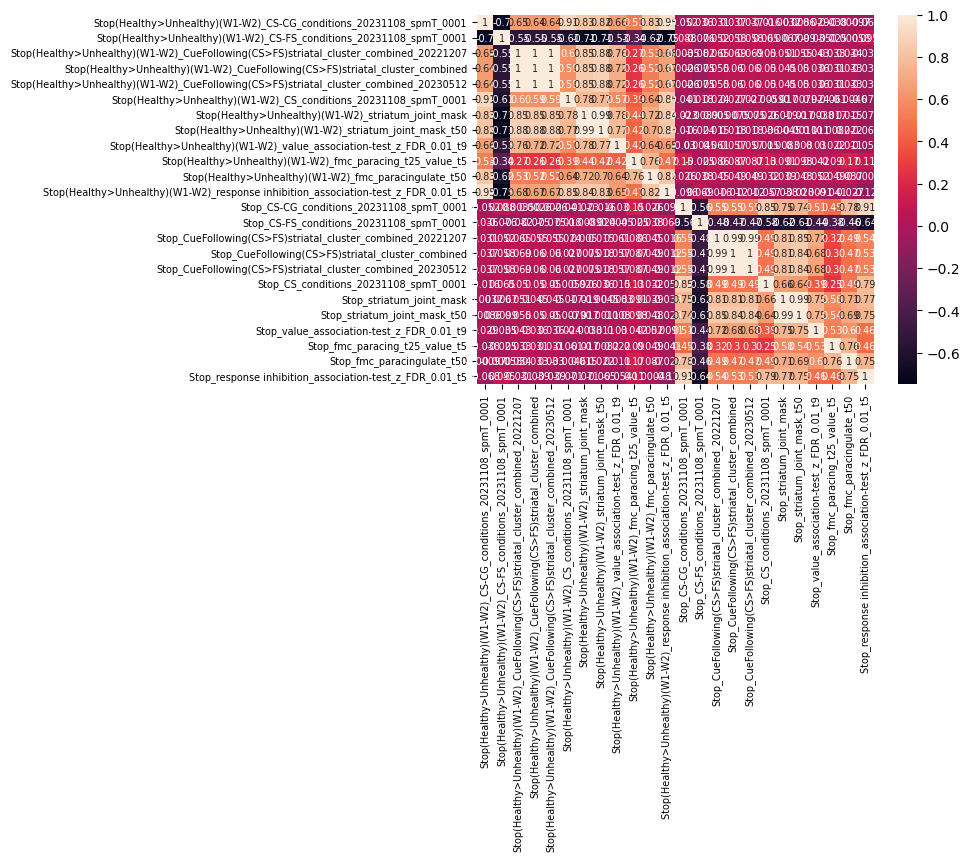

In [24]:
import matplotlib.pyplot as plt
#do a correlation matrix plot for all the valuation_cols
import seaborn as sns



#now do the corrplot
#print a heatmap with two-digit correlation coefficients for each pair of variables
#use annot=True and dont' make the font size too big
corr = subjects_with_rois[roi_colnames].corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            annot_kws={"size": 7}
            )
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)

plt.show()

Perhaps we don't have a proper control because all these ROIs are correlated, and they shouldn't be so highly correlated.

Could check this by getting the mean of each subject's image. If they're not zero, those would be driving the correlation, and we should be doing something different.

## Pre-registration summary

Overall, we found some evidence that 